# Artificial Neural Network (ANN)

- Supervised learning
- Unsupervised learning
- Reinforcement learning



Feedforward Neural Network - a network where the information moves in only one direction, forward, from the input nodes, through the hidden nodes (if any) and to the output nodes, sometimes also called a perceptron (MLP - multilayer-perceptron).
The goal of feedforward networks is to approximate some function f*. For example, for a classifier, y = f*(x) maps an input x to a category y. A feedforward network defines a mapping y = f(x;θ) and learns the value of the parameters θ that result in the best function approximation.

Network - directed acyclic graph (DAG) that contains three types of nodes: input nodes, hidden nodes, and output nodes. The input nodes receive signals from the outside world and are called visible units. The hidden nodes are intermediate processing units and are not visible to the outside world. The output nodes are also called visible units and are responsible for generating a signal into the outside world.

Chain of functions - a composition of functions g(f(x)).

Backpropagation - a method to calculate the gradient of the loss function with respect to the weights in the network.

Perceptron model - 3 Inputs and 1 output. Some mathematical operation in the 'Out' node.

Feature space - a geometric representation of the data, where each feature is an axis and each observation is a coordinate.

Separating hyperplane - a boundary that binarizes and categorizes data. It is used as a "decision boundary".


## Perceptron
![perceptron](perceptron.png)

Weights are expressing the importance of given input. The higher the weight, the more important the input is.
Weighted sum of inputs is called activation.

Output 0 or 1 is determined by the activation function - weighted sum of inputs.

$ \sum_{i=1}^{n} w_i x_i $

$$ 
output = \begin{cases}
0 & \text{if } \sum_{i=1}^{n} w_i x_i \leq threshold 
\\
1 & \text{if } \sum_{i=1}^{n} w_i x_i > threshold
\end{cases}
$$

Perceptron is a device for computing a linear function of input values and returning an output value.

## Sigmoid neuron
Similar to perceptron, but with a different activation function. Output is not 0 or 1, but a real number between 0 and 1.

$$ \sigma(z) = \frac{1}{1+e^{-z}} $$

Where z is a linear combination of inputs and weights.

$$ z = \sum_{j} w_j x_j + b $$

Where b is a bias.

$$ \sigma(z) = \frac{1}{1+e^{-(\sum_{j} w_j x_j + b)}} $$

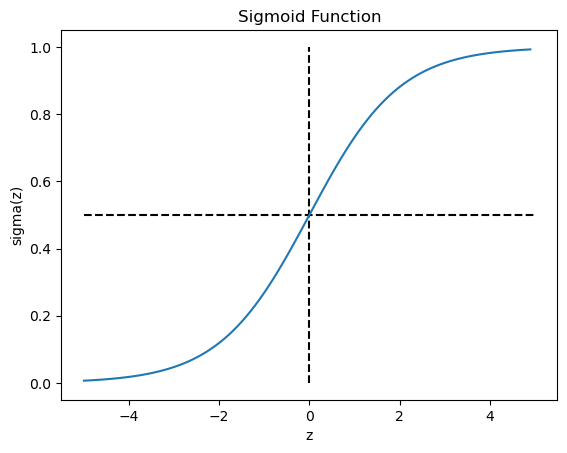

In [6]:
import numpy as np  
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
s = 1 / (1 + np.exp(-z))
fig, ax = plt.subplots()
ax.set_xlabel('z')
ax.set_ylabel('sigma(z)')
ax.set_title('Sigmoid Function')
ax.plot([0, 0], [0, 1], 'k--')
ax.plot([-5, 5], [0.5, 0.5], 'k--')
ax.plot(z, s)


An averaging machine. 
Output is $8\cdot \frac{1}{3} + 5 \cdot \frac{1}{3} - 4 \cdot \frac{1}{3} = 3$ . If you change the weights
you will get different result for same inputs. This is a dot product of two vectors.
$ y = x^Tw$ . This is linear operation.

Linear models only solve linearly separable problems.

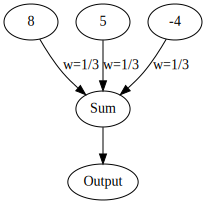

In [18]:
dot = graphviz.Digraph()
dot.node('8')
dot.node('5')
dot.node('-4')
dot.node('Sum')
dot.node('Output')
dot.edge('8','Sum', label='w=1/3')
dot.edge('5','Sum', label='w=1/3')
dot.edge('-4', 'Sum', label='w=1/3')
dot.edge('Sum', 'Output')
dot

Add one more node - signum function - 1 for positive -1 for negative. Can be written as $ \hat{y} = \sigma (x^Tw)$ . This nonlinear 
function is called sigma. This will be a **activation** function. Activation function is nonlinear.

Bias (intercept) - allows the line to go off origin. The line can be: $y=mx$ with bias term $y=mx+b$

Now get $\sigma (x^Tw + bw_0) = \hat{y}$ , usually set b = 1 because $bw_0$ is just multiplication of two numbers.

$$\sigma (x^Tw + w_0) = \hat{y} $$

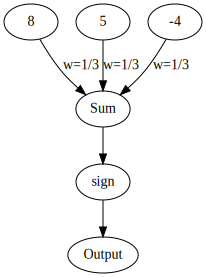

In [19]:
dot = graphviz.Digraph()
dot.node('8')
dot.node('5')
dot.node('-4')
dot.node('Sum')
dot.node('Output')
dot.node('sign')
dot.edge('8','Sum', label='w=1/3')
dot.edge('5','Sum', label='w=1/3')
dot.edge('-4', 'Sum', label='w=1/3')
dot.edge('Sum', 'sign')
dot.edge('sign', 'Output')

dot

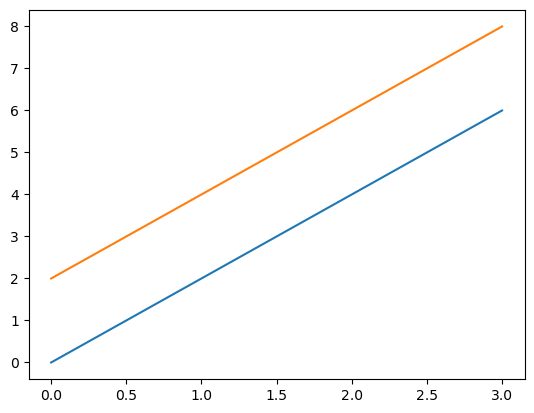

In [25]:
import numpy as np
import matplotlib.pyplot as plt

bias = 2
x = np.linspace(0, 3, 100)
plt.plot(x, 2*x)
plt.plot(x, 2*x+bias)

## Activation functions

### Hyeprbolic tangent
tanh - hyperbolic tangent function
$$ tanh(x) = \frac{e^z - e^{-z}}{e^z + e^{-z}} = \frac{sinh(x)}{cosh(x)} $$
$$ sinh(x) = \frac{e^x - e^{-x}}{2} $$
$$ cosh(x) = \frac{e^x + e^{-x}}{2} $$

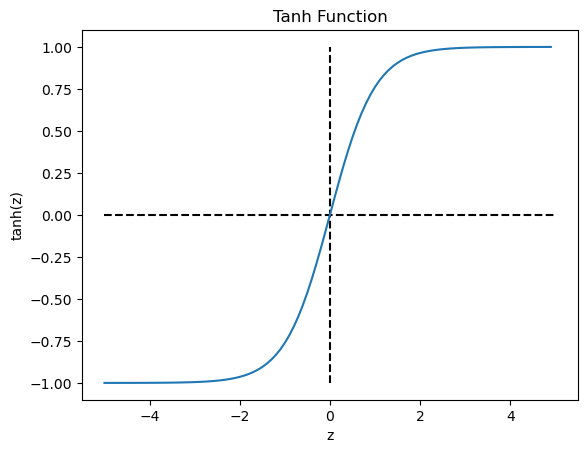

In [4]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
fz = np.tanh(z)
fig, ax = plt.subplots()
ax.set_xlabel('z')
ax.set_ylabel('tanh(z)')
ax.set_title('Tanh Function')
ax.plot([0, 0], [-1, 1], 'k--')
ax.plot([-5, 5], [0, 0], 'k--')
ax.plot(z, fz)

### Rectified linear unit - RELU
$$ f(x) = max(0,x) $$

Very good performance in practice. It is not differentiable at 0, but it is differentiable everywhere else.
Values are not bounded. It is not centered at 0. It is not symmetric. It is not zero-centered.
Vanishing gradient problem - when the gradient is very small, the weights will not be updated. RELU deals with this issue.

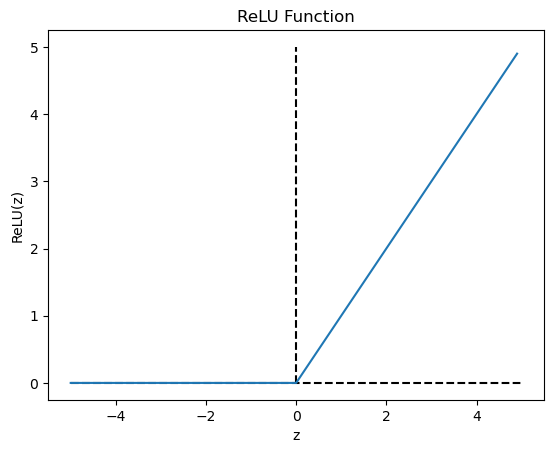

In [5]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
fz = np.maximum(0, z)
fig, ax = plt.subplots()
ax.set_xlabel('z')
ax.set_ylabel('ReLU(z)')
ax.set_title('ReLU Function')
ax.plot([0, 0], [0, 5], 'k--')
ax.plot([-5, 5], [0, 0], 'k--')
ax.plot(z, fz)


## Forward propagation

$\sigma$ is nonlinear activation function. Bias can be absorbed into the dot product.

$$ \hat{y} = \sigma (x_0w_0 + \Sigma_{i=1}^{m} x_i w_i ) = \sigma (w_0 + x^Tw) = \sigma (x^Tw)$$

Different set of weights will get different hyperplanes.

## Error, loss, cost

Binarized errors vs. continuos error. 

Continuos errors - used to learn the model.

Binarized errors - evaluating the model.

### Loss functions
**Mean squared error** (MSE) $ L = \frac{1}{2} (\hat{y} - y)^2$

Used for continuos data when the output is numerical prediction.

**Cross-entropy** (logistics)

Used for categorical data when the output is probability.

$$ L = -(y log(\hat{y}) + (1-y) log(1-\hat{y}))$$

### Cost function
From loss to cost. Average of loss.

$$ J = \frac{1}{n} \Sigma L(\hat{y_i}, y_i)$$

Goal: Find the set of weights that minimizes the losses. $ W = arg_w min J$

Change of cost function of two variables $v_1$ and $v_2$.
$$ \Delta C = \frac{\partial C}{\partial v_1} \Delta{v_1} + \frac{\partial C}{\partial v_2} \Delta v_2$$

Gradient - vector of partial derivatives.
$$ \nabla C = \begin{bmatrix}
\frac{\partial C}{\partial v_1} \\
\frac{\partial C}{\partial v_2}
\end{bmatrix}$$


## Backpropagation
$ \sigma(x^Tw) = \hat{y}$ we can update only $w$. We calculate $w \longleftarrow w - \eta \partial L$ where $\eta$ is learning rate.
And derivative of loss function. This is gradient descent.

$\frac{\partial L(\hat{y},y)}{\partial w} = \frac{\partial L(\sigma(x^Tw),y)}{\partial w}$

MSE as an example: $ L(\hat{y},y) = \frac{1}{2} (\sigma(x^Tw) - y)^2$. These are embedded functions.

For simplicity set $u = \sigma (x^Tw) - y $

With chain rule we can write $\frac{\partial L(u)}{\partial w} = \frac{\partial L(u)}{\partial u} \frac{\partial u}{\partial w} $

## Regression
Simple regression means to predict one continuos variable from another
$$ y_i = \beta_0 + \beta_1x_i + \epsilon_i$$

$\epsilon$ - error (residual)

In [7]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display


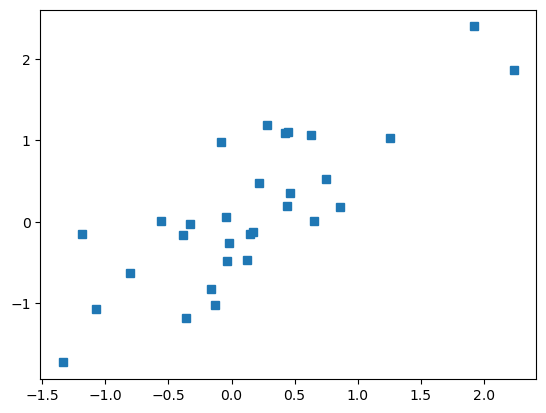

In [5]:
N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

plt.plot(x,y,'s')

In [21]:
# build model

ANNreg = nn.Sequential(
    nn.Linear(1,1), # input layer
    nn.ReLU(), # activation function
    nn.Linear(1,1) # output layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [22]:
learningRate  = 0.05
lossfun = nn.MSELoss()
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [23]:
numepochs = 500
losses = torch.zeros(numepochs)

# train the model
for epochi in range(numepochs):
    yHat = ANNreg(x)
    # compute loss
    loss = lossfun(yHat, y)
    losses[epochi] = loss

    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Text(0.5, 1.0, 'Final loss = 0.298468')

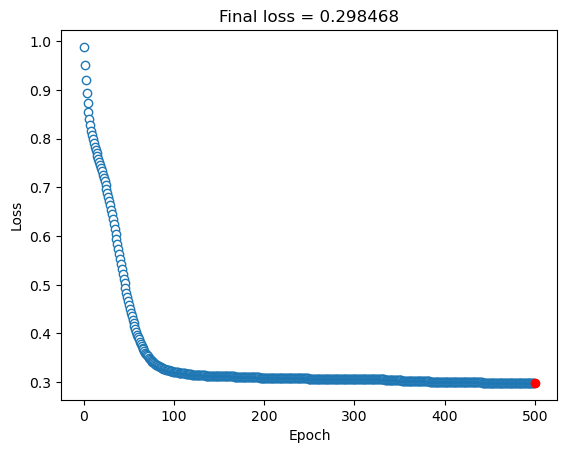

In [24]:
# Show the loss

predictions = ANNreg(x)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.plot(numepochs, testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())

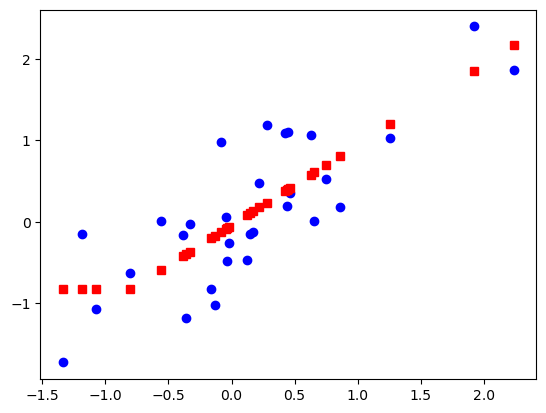

In [25]:
plt.plot(x,y, 'bo', label='Real data')
plt.plot(x, predictions.detach(), 'rs', label='Predictions')
